### Setting up

In [1]:
!pip install cartoframes

    100% |████████████████████████████████| 61kB 3.7MB/s 
  Running setup.py bdist_wheel for carto ... - done
  Stored in directory: /root/.cache/pip/wheels/7f/b1/b4/06161b13bd250dbe03c1e8fde9a045f70859c0b164a8611e5c
  Running setup.py bdist_wheel for pyrestcli ... - done
  Stored in directory: /root/.cache/pip/wheels/fb/6d/40/42e561e485b2986697964a394645dfa9eb67d59b05e31c45e3
Successfully built carto pyrestcli


In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import cartoframes

In [3]:
from google.colab import files
file = files.upload()

Saving ramirocdb.conf to ramirocdb.conf


In [4]:
import configparser

config_filename = file[next(iter(file.keys()))]
config = configparser.ConfigParser(allow_no_value=True) 
config.read_string(config_filename.decode('utf-8'))
args = config['CARTO']

print("Working with CARTO user {}.".format(args['user_name']))

Working with CARTO user ramirocdb.


In [0]:
from cartoframes import Credentials

USERNAME = args['user_name']
APIKEY = args['api_key']
creds = Credentials(username=USERNAME, 
                    key=APIKEY)
cc = cartoframes.CartoContext(creds=creds)

### Importing data

In [0]:
idealista_kpis = cc.read('idealista_indicators')
sp_employment = cc.read('historical_country_spain_indicator_full_time_employment')
sp_cons_price = cc.read('historical_country_spain_indicator_consumer_price_index_cpi')
sp_gdp = cc.read('historical_country_spain_indicator_gdp')
sp_hom_own = cc.read('historical_country_spain_indicator_home_ownership_rate')
sp_lab_cost = cc.read('historical_country_spain_indicator_labour_costs')
sp_housing_starts = cc.read('historical_country_spain_indicator_housing_starts')
sp_priv_credits = cc.read('historical_country_spain_indicator_private_sector_credit')
sp_stock_market = cc.read('historical_country_spain_indicator_stock_market')

In [10]:
sp_employment.head()

,category,country,datetime,frequency,historicaldatasymbol,lastupdate,the_geom,value
cartodb_id,,,,,,,,
1,Full Time Employment,Spain,1987-06-30,Quarterly,SPAINFULTIMEMP,2015-08-21 16:24:00,None,11007.6
2,Full Time Employment,Spain,1987-09-30,Quarterly,SPAINFULTIMEMP,2015-08-21 16:24:00,None,11295.9
3,Full Time Employment,Spain,1987-12-31,Quarterly,SPAINFULTIMEMP,2015-08-21 16:24:00,None,11407.5
4,Full Time Employment,Spain,1988-03-31,Quarterly,SPAINFULTIMEMP,2015-08-21 16:24:00,None,11388.6
5,Full Time Employment,Spain,1988-06-30,Quarterly,SPAINFULTIMEMP,2015-08-21 16:24:00,None,11452.2


In [15]:
print(sp_employment['datetime'].max())
print(sp_employment['datetime'].min())

2018-06-30 00:00:00
1987-06-30 00:00:00


### Time series plots

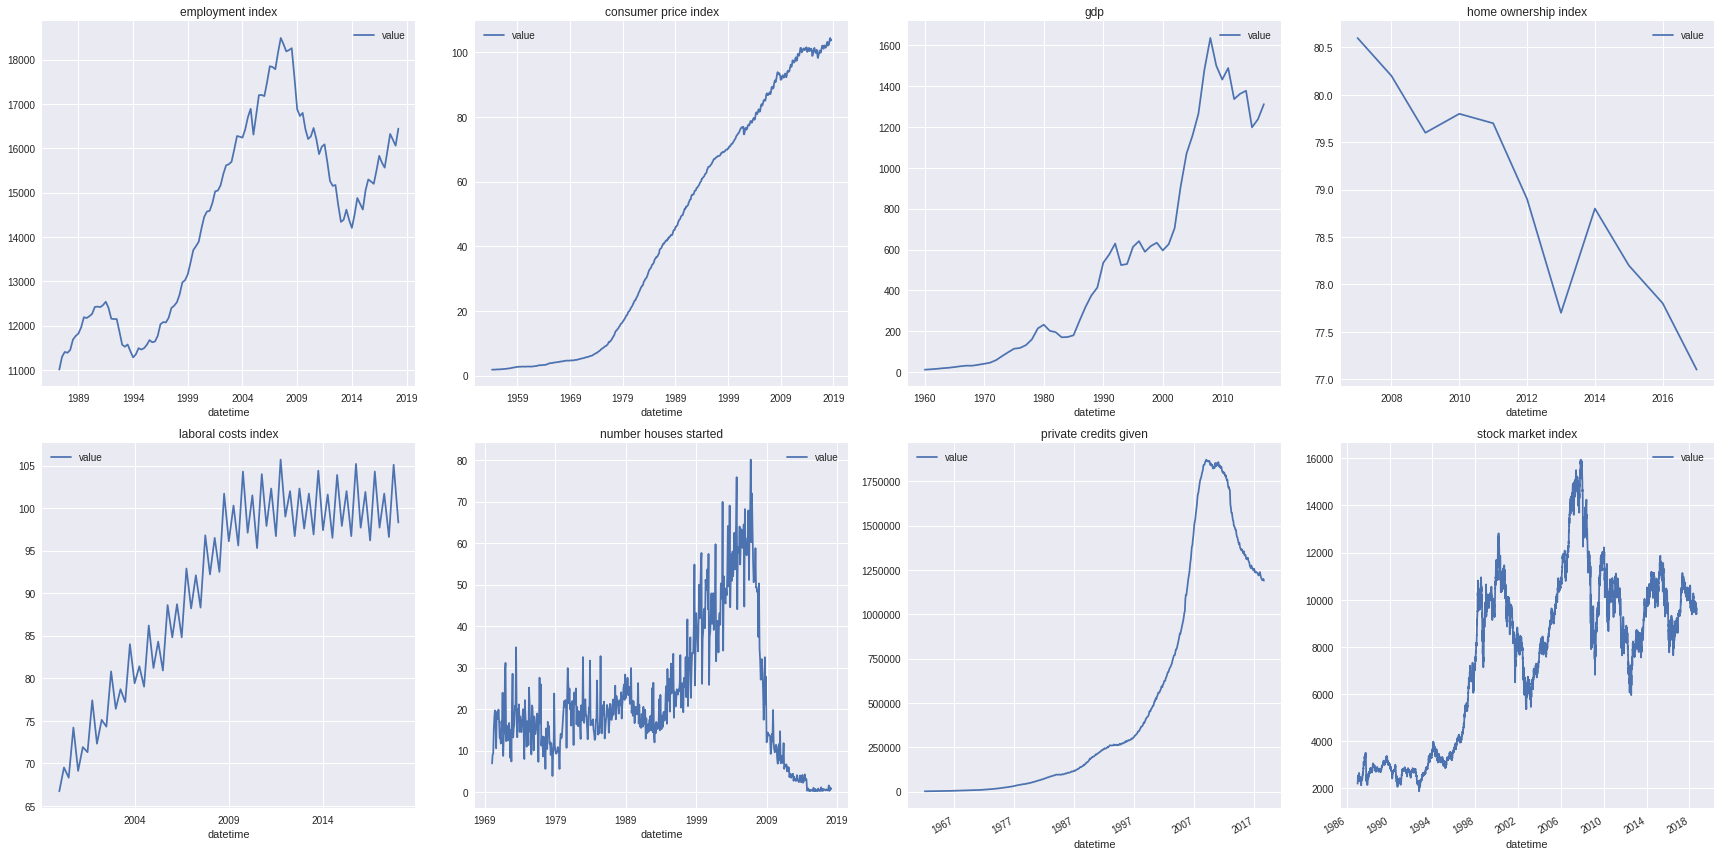

In [61]:
dfs = [
    sp_employment,
    sp_cons_price,
    sp_gdp,
    sp_hom_own,
    sp_lab_cost,
    sp_housing_starts,
    sp_priv_credits,
    sp_stock_market,
     ]

titles = ['employment index', 'consumer price index', 'gdp', 'home ownership index', 'laboral costs index', 'number houses started', 'private credits given', 'stock market index']

fig, axes = plt.subplots(2, 4, figsize=(24, 12))

for i in range(len(dfs)):
  dfs[i][['datetime','value']].set_index('datetime').plot(ax=axes[i//4][i%4])
  axes[i//4][i%4].set_title(titles[i])

fig.tight_layout()
plt.show()